## Installation

In [34]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

e:\Kuliah\Kuliah\Semester 6\Riset\crowd-detection-tult\yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import

In [4]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon
import csv
import time


In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-5-1 Python-3.12.5 torch-2.6.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Code

In [10]:
cap = cv2.VideoCapture('E:/Kuliah/Kuliah/Semester 6/Riset/crowd-detection-tult/video/dataset_1.mp4')

In [11]:
zone_kursi_hijau = [(6, 519), (402, 493), (398, 663), (4, 778)]
# Koordinat: (6, 519)
# Koordinat: (402, 493)
# Koordinat: (398, 663)
# Koordinat: (4, 778)
polygon = Polygon(zone_kursi_hijau)

# Siapkan file CSV
output_csv = open('crowd_log.csv', mode='w', newline='')
csv_writer = csv.writer(output_csv)
csv_writer.writerow(['second', 'person_in_zone'])  # Header

frame_count = 0
start_time = time.time()
frame_number = 0
fps = cap.get(cv2.CAP_PROP_FPS)  # Frame per second 

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    frame_count += 1
    frame_number += 1
    current_second = int(frame_number / fps)

    frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)

    results = model(frame)
    df = results.pandas().xyxy[0]

    person_in_zone = 0

    for _, row in df.iterrows():
        if row['name'] != 'person':
            continue

        # Dapatkan tengah bounding box
        cx = int((row['xmin'] + row['xmax']) / 2)
        cy = int((row['ymin'] + row['ymax']) / 2)

        if polygon.contains(Point(cx, cy)):
            person_in_zone += 1
            # Gambar titik tengah (opsional)
            cv2.circle(frame, (cx, cy), 5, (255, 0, 0), -1)

    # Gambar zona
    cv2.polylines(frame, [np.array(zone_kursi_hijau, np.int32)], isClosed=True, color=(0,255,255), thickness=2)
    
    # Tampilkan jumlah
    cv2.putText(frame, f"Orang di Zona: {person_in_zone}", (50, 100),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2)
    
    csv_writer.writerow([current_second, person_in_zone])

    cv2.imshow("Deteksi Orang", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

end_time = time.time()
fps = frame_count / (end_time - start_time)
print(f"FPS: {fps:.2f}")
output_csv.close()
cap.release()
cv2.destroyAllWindows()

C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master\models\comm

FPS: 10.33


## Visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

In [2]:
df = pd.read_csv('crowd_log.csv')

In [3]:
# Group by detik, lalu hitung rata-rata per detik
df_avg = df.groupby('second')['person_in_zone'].mean().reset_index()

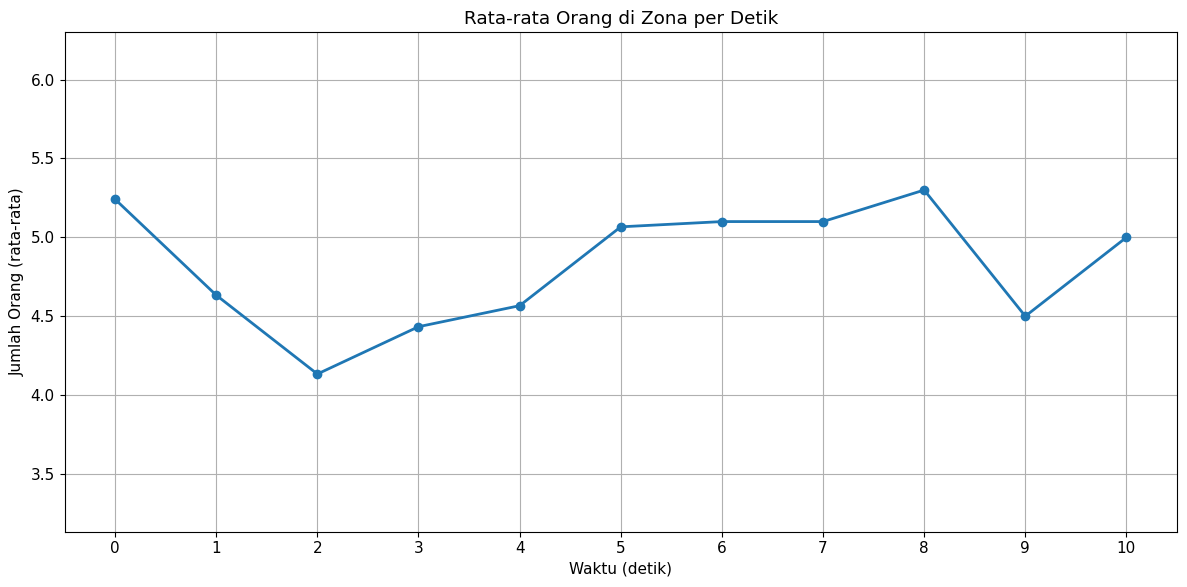

In [69]:
# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(df_avg['second'], df_avg['person_in_zone'], marker='o', linewidth=2)
plt.title('Rata-rata Orang di Zona per Detik')
plt.xlabel('Waktu (detik)')
plt.ylabel('Jumlah Orang (rata-rata)')
plt.grid(True)
plt.ylim(df_avg['person_in_zone'].min() - 1, df_avg['person_in_zone'].max() + 1)
plt.xticks(df_avg['second'])  # supaya titik per detik jelas
plt.tight_layout()


In [70]:
plt.show()

# Menampilkan data numerik
print("\nData Numerik:")
print(df_avg)


Data Numerik:
    second  person_in_zone
0        0        5.241379
1        1        4.633333
2        2        4.133333
3        3        4.433333
4        4        4.566667
5        5        5.066667
6        6        5.100000
7        7        5.100000
8        8        5.300000
9        9        4.500000
10      10        5.000000


## Kesimpulan

### Crowd Detection
Berdasarkan hasil analisis terhadap rata-rata jumlah orang yang terdeteksi di zona istirahat per detik menggunakan model YOLOv5 pretrained, dapat disimpulkan beberapa hal:

1. Fluktuasi Jumlah Orang
Grafik menunjukkan adanya fluktuasi jumlah orang dari waktu ke waktu, dengan nilai rata-rata yang bervariasi antara detik ke-0 hingga detik ke-10. Ini menunjukkan adanya pergerakan atau dinamika kerumunan yang aktif di area pengamatan.

2. Rata-Rata Jumlah Orang Stabil
Rata-rata jumlah orang per detik selama durasi pengamatan adalah 4.8 orang. Ini menunjukkan bahwa dalam kondisi normal, area kursi istirahat memiliki tingkat okupansi menengah.

3. Deteksi Konsisten
Deteksi objek oleh YOLOv5 menunjukkan konsistensi yang cukup baik dengan fluktuasi yang wajar, tanpa anomali ekstrem. Hal ini menandakan bahwa model bekerja efektif dalam mendeteksi objek manusia dalam zona yang telah ditentukan.

4. Potensi Implementasi Nyata
Dengan sistem ini, pengelola ruang dapat secara real-time. Sistem ini dapat diterapkan di cctv yang mana dapat melakukan analisis keramaian setiap detik maupun menit. Sistem akan memantau tingkat kepadatan area tertentu dan mengambil keputusan cepat, misalnya untuk mengatur sirkulasi udara, memberi peringatan kepadatan, atau membatasi akses masuk. 

In [9]:
import pandas as pd

df = pd.read_csv("crowd_log.csv")
df_avg = df.groupby("second")["person_in_zone"].agg(['mean', 'min', 'max', 'std']).reset_index()
print(df_avg)

    second      mean  min  max       std
0        0  5.241379    4    7  0.950758
1        1  4.633333    3    6  0.614948
2        2  4.133333    3    6  0.730297
3        3  4.433333    4    5  0.504007
4        4  4.566667    4    6  0.727932
5        5  5.066667    5    6  0.253708
6        6  5.100000    5    6  0.305129
7        7  5.100000    5    6  0.305129
8        8  5.300000    4    7  0.595963
9        9  4.500000    4    6  0.572351
10      10  5.000000    5    5  0.000000
